In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing updated datset with high activity customers only
df = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\high_activity_customers_updated.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [5]:
# Due to the high memory usage of the dataset, take a sample of the dataset

#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

#store 70% of the sample in df_big and 30% in df_small
df_big = df[dev]
df_small =df[~dev]

In [6]:
len(df)

30171424

In [7]:
len(df_big) + len(df_small)

30171424

In [8]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9050078 entries, 0 to 32404846
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fre

In [9]:
# changing variable type to reduce memory usage
df_small['dependants'] =df_small['dependants'].astype('category')

C:\Users\Windows\AppData\Local\Temp\ipykernel_12356\2347581353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['dependants'] =df_small['dependants'].astype('category')


In [10]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9050078 entries, 0 to 32404846
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fre

In [11]:
# rename "dependants" column to a more suitable name "dependent_group" to reflect the status of dependants (yes/no)
df_small.rename(columns = {'dependants':'dependant_group'})

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,Age,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,81,8/1/2019,1,married,49620,Midwest,Senior,low income,meat seafood,Yes
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,81,8/1/2019,1,married,49620,Midwest,Senior,low income,meat seafood,Yes
6,4913,Table Water Crackers,19,19,4.4,894221,138,23,5,13,...,81,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes
10,7987,Hazelnut Spread with Cocoa,13,13,12.8,1592314,138,5,0,9,...,81,8/1/2019,1,married,49620,Midwest,Senior,low income,pantry,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404809,48142,Diet,7,7,1.9,1905589,18512,8,0,10,...,69,6/7/2017,0,divorced/widowed,53766,Midwest,Senior,middle income,beverages,No
32404840,49235,Organic Half & Half,16,16,1.8,813102,27382,2,1,8,...,68,11/25/2019,3,married,37867,Northeast,Senior,low income,dairy eggs,Yes
32404841,49235,Organic Half & Half,16,16,1.8,2939801,27382,3,3,8,...,68,11/25/2019,3,married,37867,Northeast,Senior,low income,dairy eggs,Yes
32404842,49235,Organic Half & Half,16,16,1.8,698928,27382,4,3,7,...,68,11/25/2019,3,married,37867,Northeast,Senior,low income,dairy eggs,Yes


In [12]:
df_small_updated = df_small.rename(columns = {'dependants':'dependant_group'})

In [13]:
df_small_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9050078 entries, 0 to 32404846
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fre

In [15]:
path = r"C:\Users\Windows\Instacart Basket Analysis"

In [16]:
# save the updated smaller dataset as pickle file
df_small_updated.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_small_updated.pkl'))

### Age Group Analysis

C:\Users\Windows\Anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

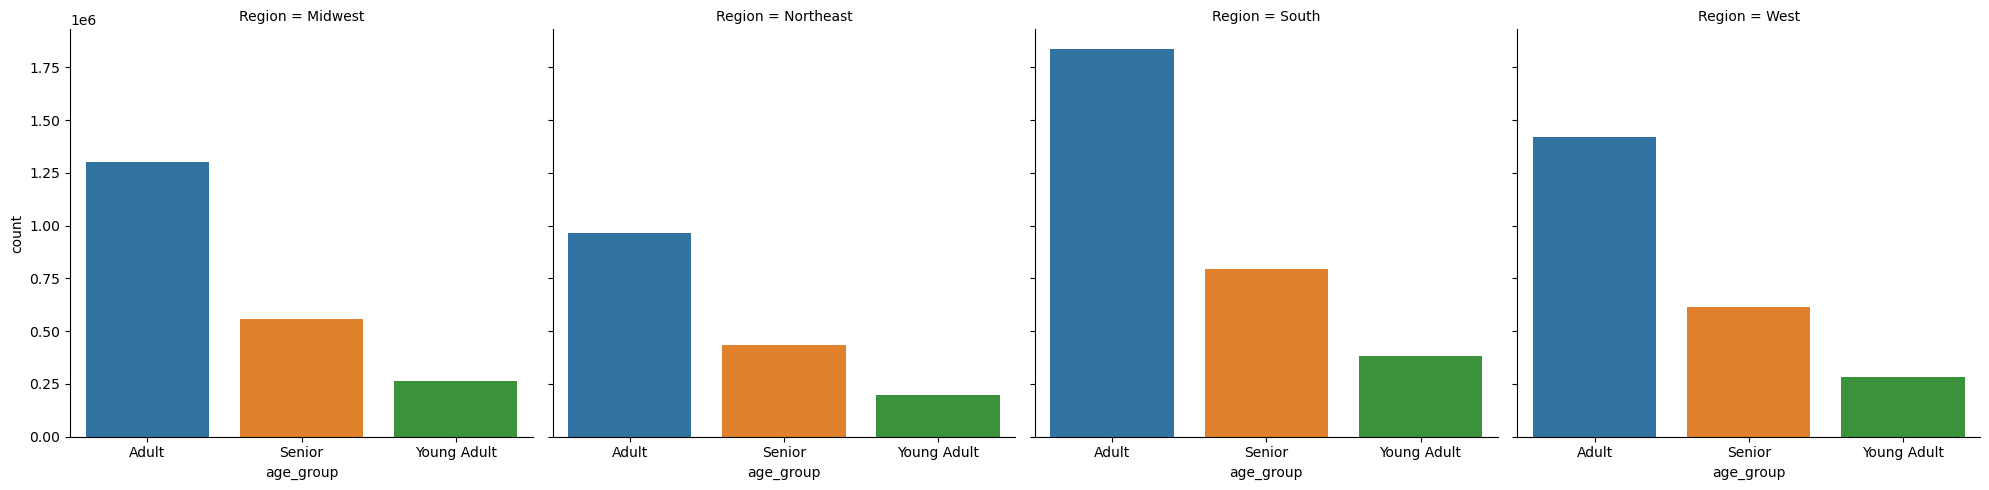

In [17]:
# Age Group Distribution by region
plt.figure(figsize=(10, 6))
sns.catplot(data=df_small_updated, x='age_group', col = 'Region', kind='count')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Fig4_age_region.png'))
plt.show()

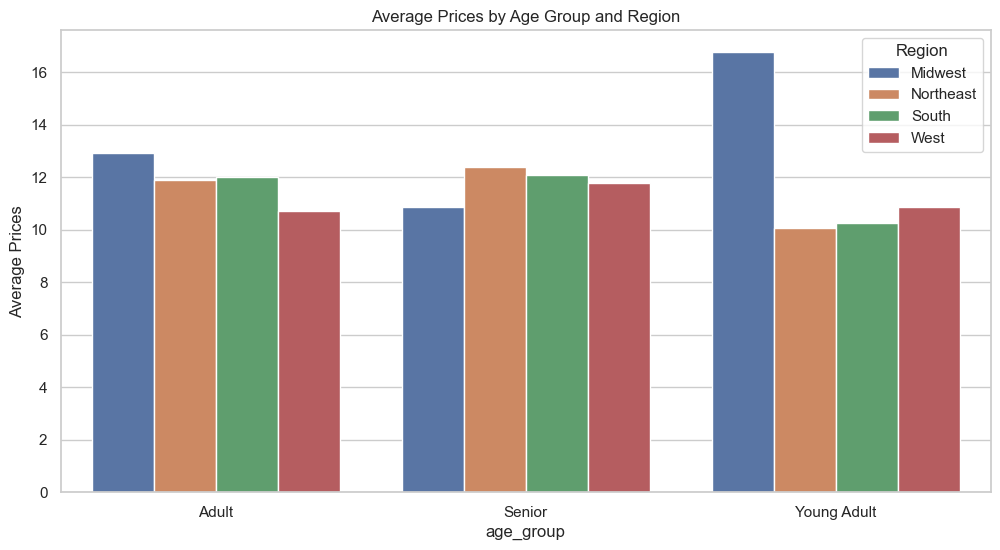

In [21]:
# Average Prices/Order Cost by Age Group and Region 
plt.figure(figsize=(12, 6))
sns.barplot(data=df_small_updated, x='age_group', y='prices', hue='Region', errorbar=None)
plt.title('Average Prices by Age Group and Region')
plt.ylabel('Average Prices')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Fig5_age_region_orders.png'))
plt.show()

In [22]:
df_small_updated.groupby('age_group')['prices'].agg(['max','min','mean'])


,max,min,mean
age_group,,,
Adult,99999.0,1.0,11.868159
Senior,99999.0,1.0,11.767389
Young Adult,99999.0,1.0,11.886734


In [23]:
df_small_updated.groupby(['age_group', 'Region'])['prices'].agg(['max','min','mean'])

max  min       mean
age_group   Region                            
Adult       Midwest    99999.0  1.0  12.915657
            Northeast  99999.0  1.0  11.875082
            South      99999.0  1.0  12.004538
            West       99999.0  1.0  10.725155
Senior      Midwest    99999.0  1.0  10.856597
            Northeast  99999.0  1.0  12.379616
            South      99999.0  1.0  12.070160
            West       99999.0  1.0  11.767824
Young Adult Midwest    99999.0  1.0  16.758087
            Northeast  99999.0  1.0  10.060842
            South      99999.0  1.0  10.260678
            West       99999.0  1.0  10.849334

In [25]:
df_small_updated.groupby(['age_group', 'Region'])['days_since_prior_order'].agg(['max','min','mean'])

max  min       mean
age_group   Region                         
Adult       Midwest    30.0  0.0  10.485374
            Northeast  30.0  0.0  10.545505
            South      30.0  0.0  10.471549
            West       30.0  0.0  10.337844
Senior      Midwest    30.0  0.0  10.575878
            Northeast  30.0  0.0  10.229315
            South      30.0  0.0  10.438422
            West       30.0  0.0  10.451879
Young Adult Midwest    30.0  0.0  10.581944
            Northeast  30.0  0.0  10.231767
            South      30.0  0.0  10.445276
            West       30.0  0.0  10.523516